# Health Claims

In [1]:
import pandas as pd
import numpy as np
import pickle
import string
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,savefig
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [10]:
df = pd.read_excel('../Data/data/Foodmaestro- Health Claim Data .xlsx')
df.head()

,FM Data - Health Claims
0,Bones: Vitamin D supports normal bones
1,Bones: Vitamin D supports the maintenance of...
2,Brain: DHA supports normal brain function
3,Calcium & Vitamin D support normal bones
4,DHA supports normal brain function


## NLTK

### Determine if there are missing values

In [11]:
for col in df.columns:
    print(col, df[col].isnull().sum())

FM Data - Health Claims  0


### Expanding Contractions

In [12]:
df['no_contract'] = df['FM Data - Health Claims '].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,FM Data - Health Claims,no_contract
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]"


In [22]:
# Convert to string
df['FM Data - Health Claims_str'] = [' '.join(map(str, l)) for l in df['no_contract']] 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function


### Tokenization

In [23]:
df['tokenized'] = df['FM Data - Health Claims_str'].apply(word_tokenize) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct..."
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]"


### Converting all Characters to Lowercase

In [24]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x]) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct..."
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]"


### Removing Punctuations

In [25]:
punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]"


### Removing Stopwords

In [26]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]"


### Stemming and Lemmatization

In [27]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)..."
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor..."
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ..."
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br..."


In [28]:
# Convert to wordnet’s format

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor..."
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,..."
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no..."
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,..."


In [29]:
# Lemmatization
wnl = WordNetLemmatizer() 
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x]) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor...","[bone, vitamin, support, normal, bone]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai...","[bone, vitamin, support, maintenance, normal, ..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,...","[brain, dha, support, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no...","[calcium, vitamin, support, normal, bone]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,...","[dha, support, normal, brain, function]"


In [30]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor...","[bone, vitamin, support, normal, bone]",bone vitamin support normal bone
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai...","[bone, vitamin, support, maintenance, normal, ...",bone vitamin support maintenance normal bone
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,...","[brain, dha, support, normal, brain, function]",brain dha support normal brain function
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no...","[calcium, vitamin, support, normal, bone]",calcium vitamin support normal bone
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,...","[dha, support, normal, brain, function]",dha support normal brain function


In [31]:
df['tags'] = df['pos_tags'].apply(lambda x: [tag for (word, tag) in x]) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,tags
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor...","[bone, vitamin, support, normal, bone]",bone vitamin support normal bone,"[NNS, NNS, NNS, JJ, NNS]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai...","[bone, vitamin, support, maintenance, normal, ...",bone vitamin support maintenance normal bone,"[NNS, NNS, NNS, NN, JJ, NNS]"
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,...","[brain, dha, support, normal, brain, function]",brain dha support normal brain function,"[NN, NN, NNS, JJ, NN, NN]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no...","[calcium, vitamin, support, normal, bone]",calcium vitamin support normal bone,"[NN, JJ, NN, JJ, NNS]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,...","[dha, support, normal, brain, function]",dha support normal brain function,"[NN, NNS, JJ, NN, NN]"


In [32]:
output = open('../cleaning data.pkl','wb')
pickle.dump(df,output)

### Word frequency analysis

In [2]:
with open('../cleaning data.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,tags
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor...","[bone, vitamin, support, normal, bone]",bone vitamin support normal bone,"[NNS, NNS, NNS, JJ, NNS]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai...","[bone, vitamin, support, maintenance, normal, ...",bone vitamin support maintenance normal bone,"[NNS, NNS, NNS, NN, JJ, NNS]"
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,...","[brain, dha, support, normal, brain, function]",brain dha support normal brain function,"[NN, NN, NNS, JJ, NN, NN]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no...","[calcium, vitamin, support, normal, bone]",calcium vitamin support normal bone,"[NN, JJ, NN, JJ, NNS]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,...","[dha, support, normal, brain, function]",dha support normal brain function,"[NN, NNS, JJ, NN, NN]"


### Words with the top 10 frequency

In [3]:
# Get a list of words
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

In [4]:
mostcommon_word = nltk.FreqDist(allwords).most_common(10)
print(mostcommon_word)

[('normal', 2405), ('vitamin', 2352), ('contribute', 1683), ('help', 1203), ('function', 1060), ('c', 766), ('system', 759), ('bone', 748), ('support', 690), ('maintenance', 678)]


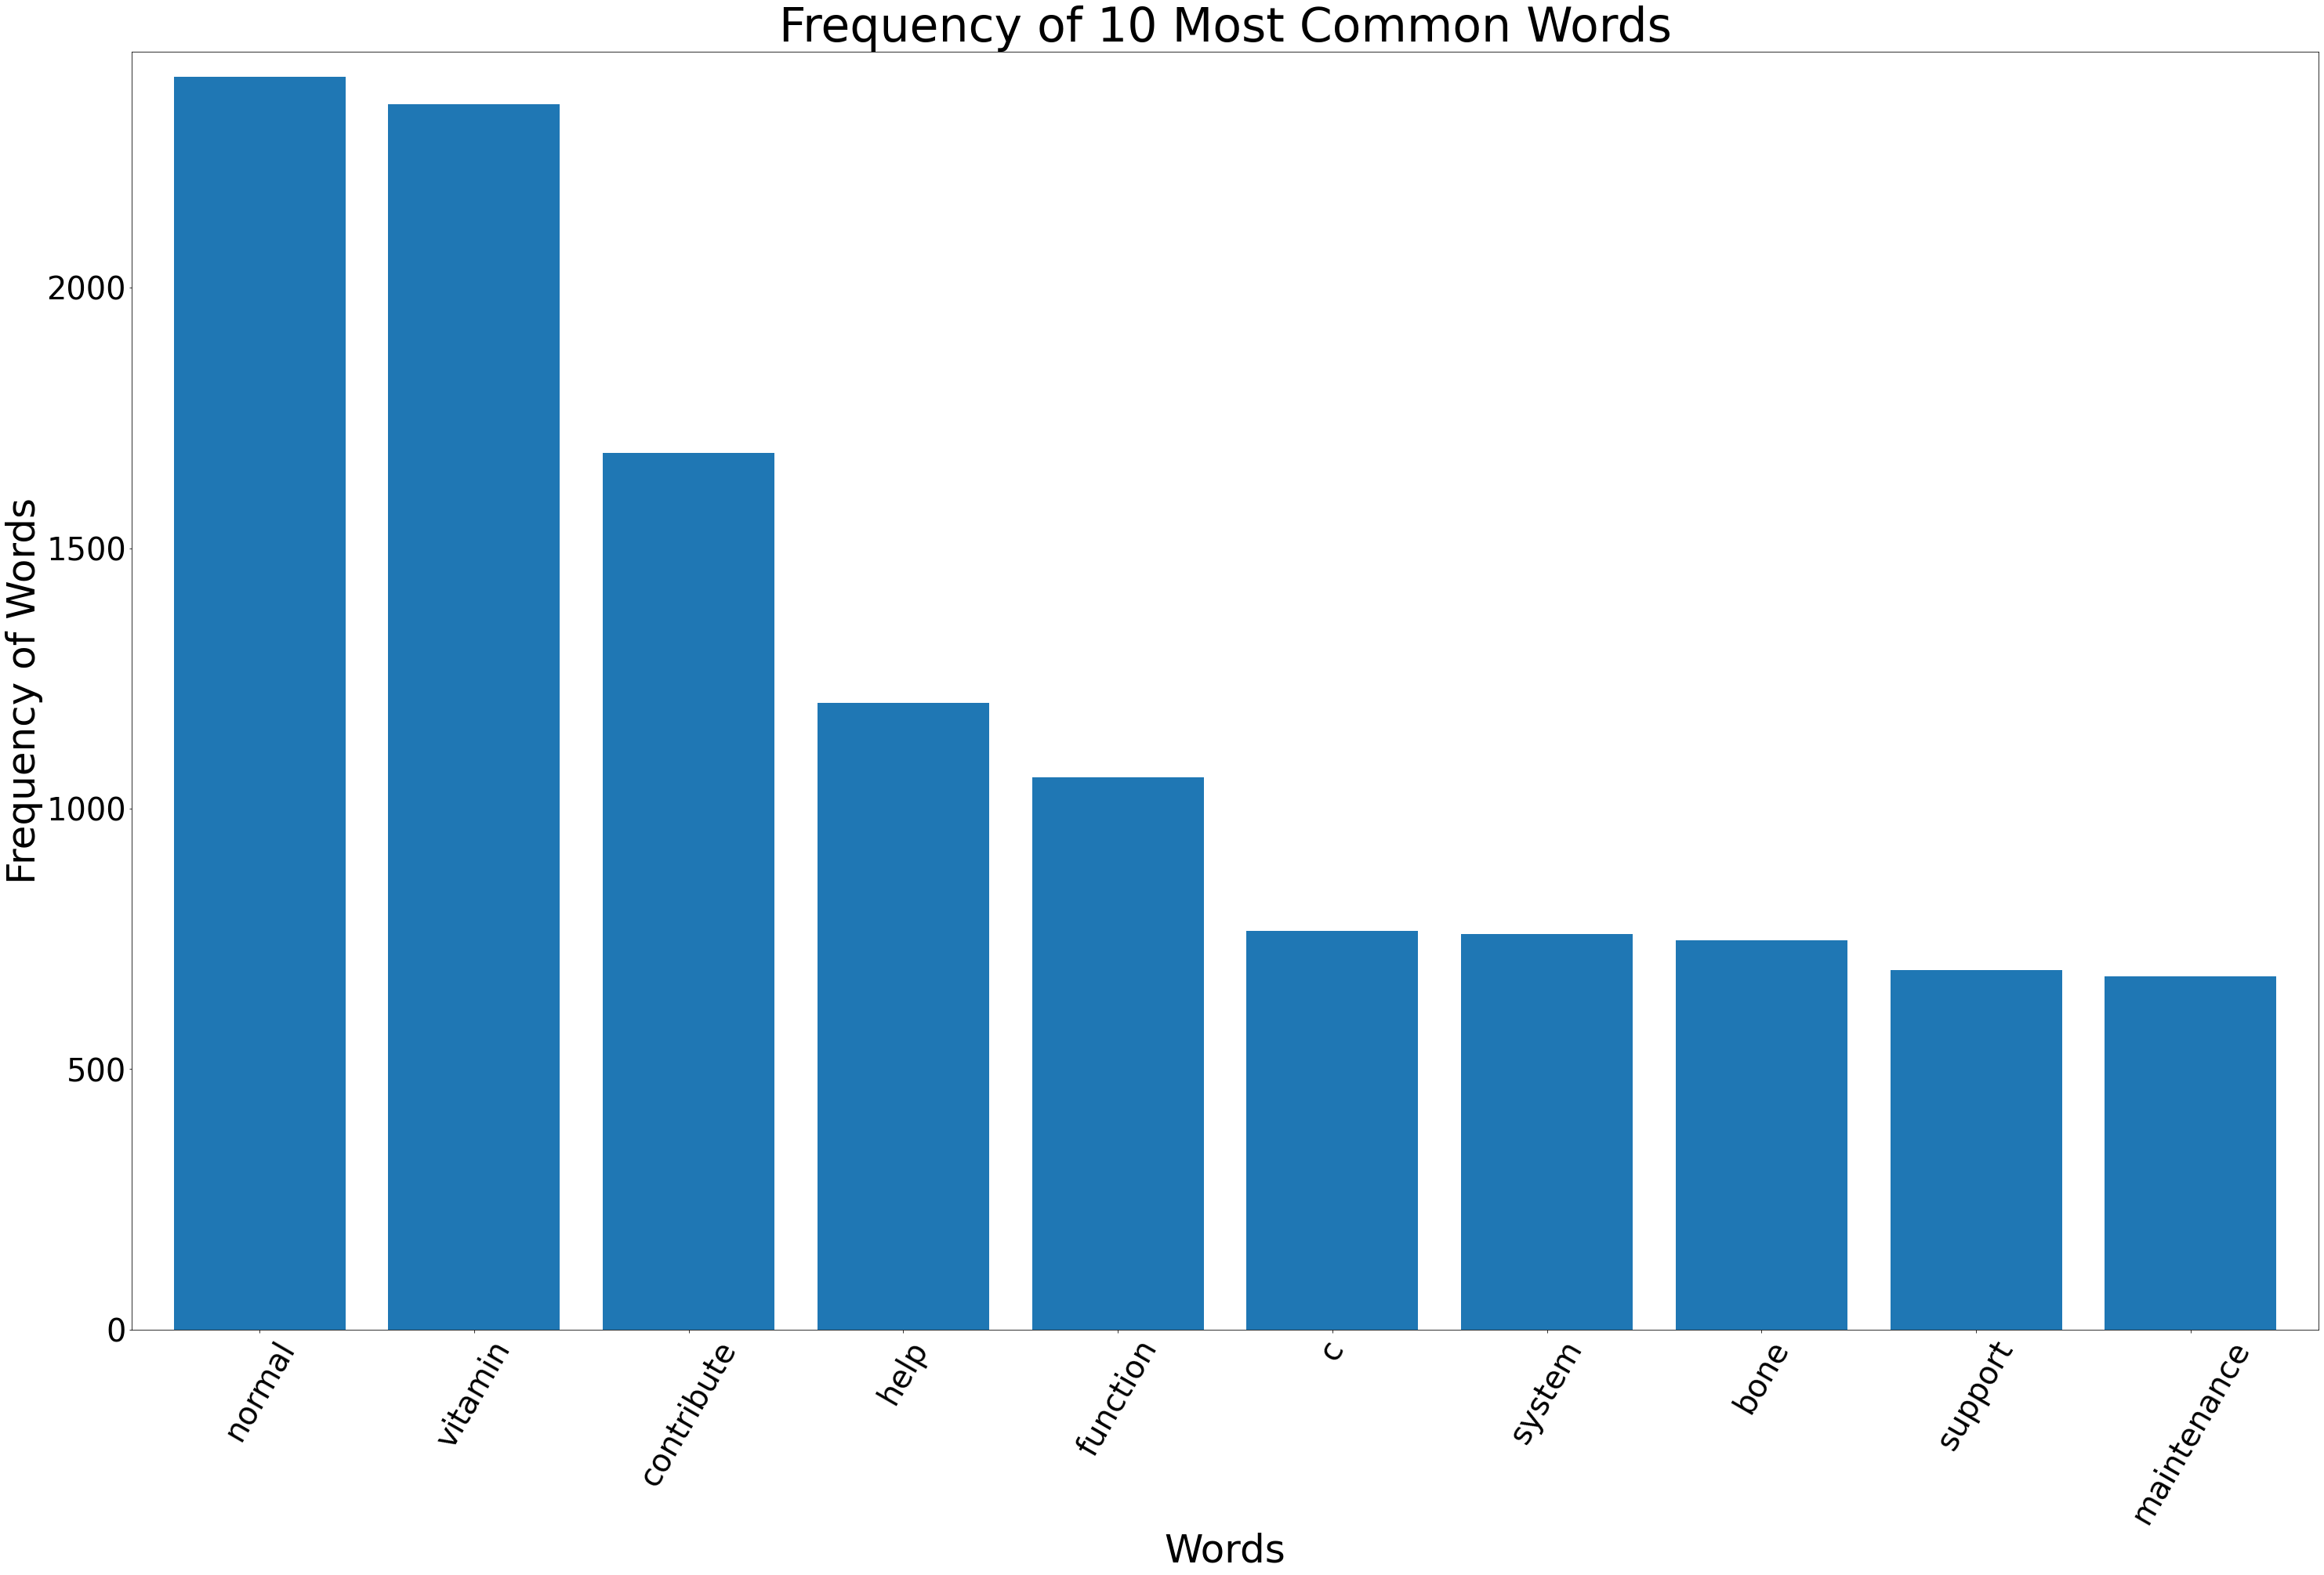

In [5]:
x, y = zip(*mostcommon_word)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 10 Most Common Words', fontsize=60)
plt.savefig('../EDA/top10 word.jpg')
plt.show()

In [42]:
print('Lexical Complexity: {:.2f}%'.format(len(set(allwords))/len(allwords)*100))

Word Complexity: 3.15%


### Word tags with the top 10 frequency

In [7]:
# Get a list of tags
tags = df['tags']
alltags = []
for taglist in tags:
    alltags += taglist


In [8]:
mostcommon_tag = nltk.FreqDist(alltags).most_common(10)
print(mostcommon_tag)

[('NN', 18847), ('JJ', 8160), ('NNS', 3776), ('VBZ', 2197), ('VBP', 1189), ('VB', 1157), ('VBG', 860), ('RB', 643), ('CD', 570), ('VBD', 479)]


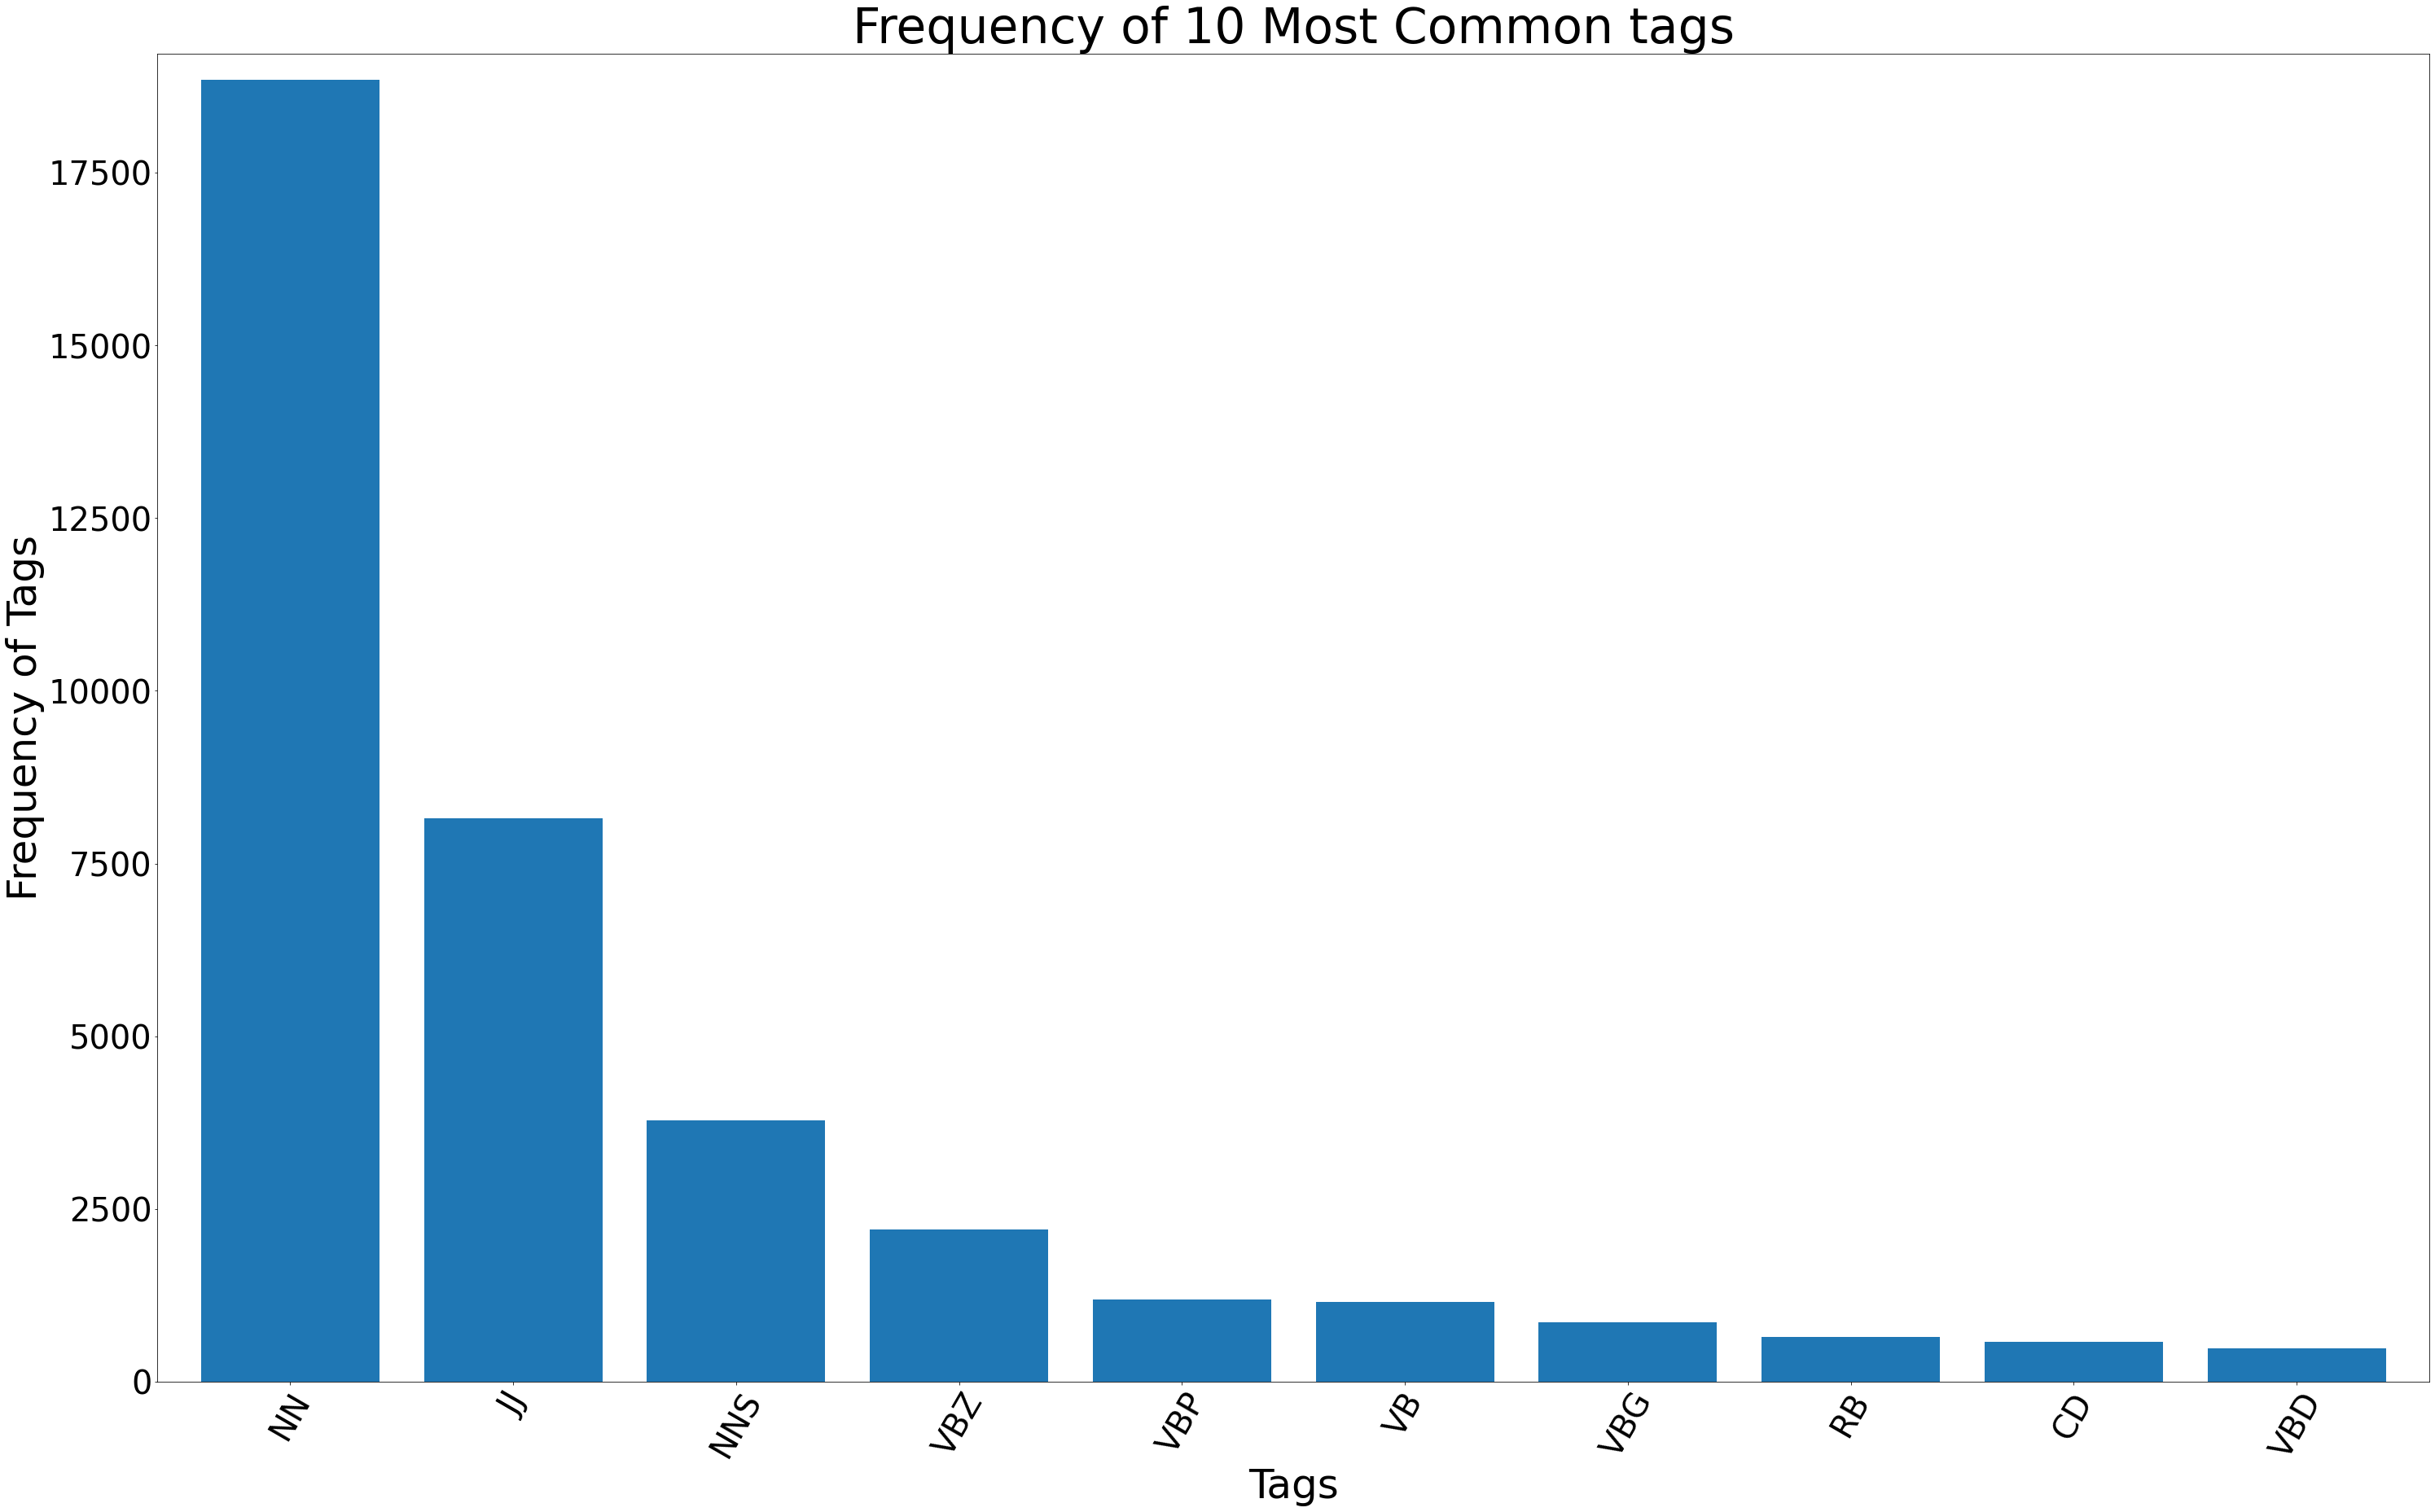

In [9]:
x, y = zip(*mostcommon_tag)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Tags', fontsize=50)
plt.ylabel('Frequency of Tags', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 10 Most Common tags', fontsize=60)
plt.savefig('../EDA/top10 tag.jpg')
plt.show()

In [10]:
t  = df.iloc[0:2,0].values
tags = nltk.pos_tag(word_tokenize(str(t)))
tag_fd = nltk.FreqDist(tag for (word, tag) in tags)
tag_fd


FreqDist({'NN': 4, 'NNP': 4, 'NNS': 3, "''": 2, ':': 2, 'VBZ': 2, 'JJ': 2, 'DT': 1, 'IN': 1, 'POS': 1})

## Spacy

In [7]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [13]:
df_spacy = pd.read_excel('../Data/data/Foodmaestro- Health Claim Data .xlsx')
df_spacy.head()

,FM Data - Health Claims
0,Bones: Vitamin D supports normal bones
1,Bones: Vitamin D supports the maintenance of...
2,Brain: DHA supports normal brain function
3,Calcium & Vitamin D support normal bones
4,DHA supports normal brain function


In [14]:
df_spacy['no_contract'] = df_spacy['FM Data - Health Claims '].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_spacy.head()

,FM Data - Health Claims,no_contract
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]"


In [15]:
# Convert to string
df_spacy['FM Data - Health Claims_str'] = [' '.join(map(str, l)) for l in df['no_contract']] 
df_spacy.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function


In [11]:
df_spacy['tokenized'] = df_spacy['FM Data - Health Claims_str'].apply(lambda x: [token.text for token in nlp(x)]) 
df_spacy.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct..."
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]"


In [12]:
punc = string.punctuation
df_spacy['lower'] = df_spacy['tokenized'].apply(lambda x: [word.lower() for word in x]) 
df_spacy['no_punc'] = df_spacy['lower'].apply(lambda x: [word for word in x if word not in punc])
df_spacy.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]"


In [13]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
df_spacy['stopwords_removed'] = df_spacy['no_punc'].apply(lambda x: [word for word in x if word not in spacy_stopwords])
df_spacy.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, d, supports, maintenance, nor..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]"


In [14]:
# Convert to string
df_spacy['stopwords_removed_str'] = [' '.join(map(str, l)) for l in df['stopwords_removed']] 

df_spacy['lemmatized'] = df_spacy['stopwords_removed_str'].apply(lambda x: [token.lemma_ for token in nlp(x) ])
df_spacy.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,stopwords_removed_str,lemmatized
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]",bones vitamin supports normal bones,"[bone, vitamin, support, normal, bone]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, d, supports, maintenance, nor...",bones vitamin supports maintenance normal bones,"[bone, vitamin, support, maintenance, normal, ..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]",brain dha supports normal brain function,"[brain, dha, support, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]",calcium vitamin support normal bones,"[calcium, vitamin, support, normal, bone]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]",dha supports normal brain function,"[dha, support, normal, brain, function]"


In [15]:
df_spacy['lemmatized'] = df_spacy['stopwords_removed_str'].apply(lambda x: [token.lemma_ for token in nlp(x) ])
df_spacy.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,stopwords_removed_str,lemmatized
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]",bones vitamin supports normal bones,"[bone, vitamin, support, normal, bone]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, d, supports, maintenance, nor...",bones vitamin supports maintenance normal bones,"[bone, vitamin, support, maintenance, normal, ..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]",brain dha supports normal brain function,"[brain, dha, support, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]",calcium vitamin support normal bones,"[calcium, vitamin, support, normal, bone]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]",dha supports normal brain function,"[dha, support, normal, brain, function]"


In [16]:
df_spacy['tag'] = df_spacy['stopwords_removed_str'].apply(lambda x: [token.tag_ for token in nlp(x)])

In [17]:
df_spacy.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,stopwords_removed_str,lemmatized,tag
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]",bones vitamin supports normal bones,"[bone, vitamin, support, normal, bone]","[NNS, NN, VBZ, JJ, NNS]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, d, supports, maintenance, nor...",bones vitamin supports maintenance normal bones,"[bone, vitamin, support, maintenance, normal, ...","[NNS, NN, VBZ, NN, JJ, NNS]"
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]",brain dha supports normal brain function,"[brain, dha, support, normal, brain, function]","[NN, NN, VBZ, JJ, NN, NN]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]",calcium vitamin support normal bones,"[calcium, vitamin, support, normal, bone]","[NN, NN, VBP, JJ, NNS]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]",dha supports normal brain function,"[dha, support, normal, brain, function]","[NN, VBZ, JJ, NN, NN]"


In [58]:
# Get a list of words
words = df_spacy['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

# Get a list of tags
tags = df_spacy['tag']
alltags = []
for taglist in tags:
    alltags += taglist

In [62]:
from collections import Counter

In [65]:
Counter(allwords).most_common(10)

[('normal', 2405),
 ('vitamin', 2375),
 ('contribute', 2009),
 ('help', 1179),
 ('function', 1070),
 ('c', 766),
 ('system', 759),
 ('bone', 748),
 ('support', 690),
 ('maintenance', 678)]

In [66]:
Counter(alltags).most_common(10)

[('NN', 18902),
 ('JJ', 6866),
 ('VBZ', 3021),
 ('NNS', 2757),
 ('NNP', 2190),
 ('VB', 1322),
 ('VBG', 872),
 ('VBP', 829),
 ('CD', 687),
 ('RB', 459)]

<AxesSubplot:>

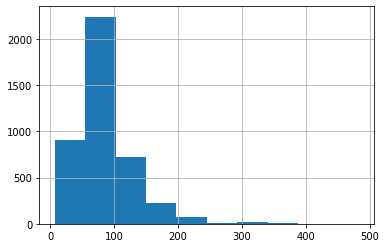

In [56]:
df_spacy['FM Data - Health Claims ' ].str.len().hist()

### Named Entity Recognition

In [18]:
df_new = df[['no_punc']]

In [19]:

df_new['pos_tags'] = df_new['no_punc'].apply(nltk.tag.pos_tag) 
df_new.head()

D:\TMP\ipykernel_31084\2190934934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['pos_tags'] = df_new['no_punc'].apply(nltk.tag.pos_tag)


,no_punc,pos_tags
0,"[bones, vitamin, d, supports, normal, bones]","[(bones, NNS), (vitamin, VBP), (d, JJ), (suppo..."
1,"[bones, vitamin, d, supports, the, maintenance...","[(bones, NNS), (vitamin, VBP), (d, JJ), (suppo..."
2,"[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor..."
3,"[calcium, vitamin, d, support, normal, bones]","[(calcium, NN), (vitamin, NN), (d, JJ), (suppo..."
4,"[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br..."


In [31]:
df_new.iloc[2,1]

[('brain', 'NN'),
 ('dha', 'NN'),
 ('supports', 'NNS'),
 ('normal', 'JJ'),
 ('brain', 'NN'),
 ('function', 'NN')]

In [20]:
ne = nltk.ne_chunk(df_new.iloc[2,1],binary=True)
print(ne)
ne.draw()

(S brain/NN dha/NN supports/NNS normal/JJ brain/NN function/NN)


### Dependency Parsing

In [18]:
sentence = df_spacy.iloc[2721,2]
sentence

'This juice is a source of Vitamin C which contributes to the normal function of the immune system'

In [10]:
doc = nlp(sentence)
print(f"{'Node (from)-->':<15} {'Relation':^10} {'-->Node (to)':>15}\n")
for token in doc:
    print("{:<15} {:^10} {:>15}".format(str(token.head.text), str(token.dep_), str(token.text)))
displacy.render(doc, style='dep')

Node (from)-->   Relation     -->Node (to)

juice              det                This
is                nsubj              juice
is                 ROOT                 is
source             det                   a
is                 attr             source
source             prep                 of
C                compound          Vitamin
of                 pobj                  C
contributes       nsubj              which
source            relcl        contributes
contributes        prep                 to
function           det                 the
function           amod             normal
to                 pobj           function
function           prep                 of
system             det                 the
system             amod             immune
of                 pobj             system


In [74]:
import stanza

In [122]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,ner,mwt,pos,lemma,depparse')
doc = nlp(sentence)
doc.sentences[0].print_dependencies()

print ("{:<15} | {:<10} | {:<15} ".format('Token', 'Relation', 'Head'))
print ("-" * 50)
  
# Convert sentence object to dictionary  
sent_dict = doc.sentences[0].to_dict()

# iterate to print the token, relation and head
for word in sent_dict:
  print ("{:<15} | {:<10} | {:<15} "
         .format(str(word['text']),str(word['deprel']), str(sent_dict[word['head']-1]['text'] if word['head'] > 0 else 'ROOT')))


('This', 2, 'det')
('juice', 5, 'nsubj')
('is', 5, 'cop')
('a', 5, 'det')
('source', 0, 'root')
('of', 8, 'case')
('Vitamin', 8, 'compound')
('C', 5, 'nmod')
('which', 10, 'nsubj')
('contributes', 8, 'acl:relcl')
('to', 14, 'case')
('the', 14, 'det')
('normal', 14, 'amod')
('function', 10, 'obl')
('of', 18, 'case')
('the', 18, 'det')
('immune', 18, 'amod')
('system', 14, 'nmod')
Token           | Relation   | Head            
--------------------------------------------------
This            | det        | juice           
juice           | nsubj      | source          
is              | cop        | source          
a               | det        | source          
source          | root       | ROOT            
of              | case       | C               
Vitamin         | compound   | C               
C               | nmod       | source          
which           | nsubj      | contributes     
contributes     | acl:relcl  | C               
to              | case       | function

### NER

In [123]:
nlp = stanza.Pipeline('en', package='mimic', processors={'ner': 'i2b2'})
doc = nlp(sentence)
print(sentence)
print(*[f'entity: {ent.text}\ttype: {ent.type}' for sent in doc.sentences for ent in sent.ents], sep='\n')

2022-05-03 07:07:50 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | mimic   |
| pos       | mimic   |
| lemma     | mimic   |
| depparse  | mimic   |
| ner       | i2b2    |

2022-05-03 07:07:50 INFO: Use device: cpu
2022-05-03 07:07:50 INFO: Loading: tokenize
2022-05-03 07:07:50 INFO: Loading: pos
2022-05-03 07:07:50 INFO: Loading: lemma
2022-05-03 07:07:51 INFO: Loading: depparse
2022-05-03 07:07:51 INFO: Loading: ner
2022-05-03 07:07:51 INFO: Done loading processors!


This juice is a source of Vitamin C which contributes to the normal function of the immune system
entity: Vitamin C	type: TREATMENT


In [15]:
displacy.render(doc, style="ent")

### Keyword extraction

In [16]:
import pytextrank

In [19]:
# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(sentence)

# examine the top-ranked phrases in the document
for phrase in doc._.phrases:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)


Vitamin C
0.18523033836489972 2
[Vitamin C, Vitamin C]
the immune system
0.16068764913063904 1
[the immune system]
the normal function
0.1222181331101917 1
[the normal function]
a source
0.053010735584499286 1
[a source]
This juice
0.04679448517509138 1
[This juice]
which
0.0 1
[which]


In [21]:
# Using spacy's pos_ attribute to check for part of speech tags
for token in doc:
  if token.pos_=='NOUN' or token.pos_=='VERB':
    print(token.text)


juice
source
Vitamin
C
contributes
function
system


In [31]:
# creating a empty list to store keywords
keywords_list = []

# List of the POS categories which you think are significant
desired_pos = ['ADJ', 'NOUN', 'VERB']

# Import punctuations for text cleaning
from string import punctuation


# Iterating through tokens 
for token in doc: 
  # checking if a token is stopword or punctuation
  if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
    # If true, they are just ignored and loop goes to the next token
    continue
  #  checking if the POS tag of the token is in our desired list
  if(token.pos_ in desired_pos):
    # If true, append the token to our keywords list
    keywords_list.append(token.text)

In [32]:
# Importing Counter frpm Collections module
from collections import Counter

# creating dictionary of keywords + frequency
dictionary = Counter(keywords_list) 
print(dictionary)

Counter({'juice': 1, 'source': 1, 'Vitamin': 1, 'C': 1, 'contributes': 1, 'normal': 1, 'function': 1, 'immune': 1, 'system': 1})


In [33]:
# find the highest frequency 
highest_frequency = Counter(keywords_list).most_common(1)[0][1] 

# Normalizing process
for word in dictionary:
    dictionary[word] = (dictionary[word]/highest_frequency) 

print(dictionary)

Counter({'juice': 1.0, 'source': 1.0, 'Vitamin': 1.0, 'C': 1.0, 'contributes': 1.0, 'normal': 1.0, 'function': 1.0, 'immune': 1.0, 'system': 1.0})


In [29]:
# Creating a dictionary to store the score of each sentence
score={}

# Iterating through each sentence
for sentence in doc.sents: 
    # Iterating through token of each sentence
    for token in sentence:
        # checking if the token is a keyword 
        if token.text in dictionary.keys():

            # If true , add the frequency of keyword to the score dictionary 
            if sentence in score.keys():

                score[sentence]+=dictionary[token.text]
            else:
                score[sentence]=dictionary[token.text]

print(score)

{This juice is a source of Vitamin C which contributes to the normal function of the immune system: 9.0}


In [30]:
# sorting the sentence scores
sorted_score = sorted(score.items(), key=lambda kv: kv[1], reverse=True)

In [34]:
# list to store sentences of summary
text_summary=[]

# Deciding the  total no of sentences in summary
no_of_sentences=4

# to count the no of sentence we already added to summary
total = 0
for i in range(len(sorted_score)):
    # appending to the summary
    text_summary.append(str(sorted_score[i][0]).capitalize()) 
    total += 1
    # checking if limit exceeded
    if(total >= no_of_sentences):
        break 

print(text_summary)

['This juice is a source of vitamin c which contributes to the normal function of the immune system']


### Translatation

In [4]:
# Import the model
from happytransformer import HappyTextToText

happytt = HappyTextToText("MARIAN","Helsinki-NLP/opus-mt-en-fr")

happytt.generate_

Downloading: 100%|██████████| 1.26k/1.26k [00:00<00:00, 429kB/s]
Downloading: 100%|██████████| 287M/287M [00:26<00:00, 11.5MB/s] 
Downloading: 100%|██████████| 42.0/42.0 [00:00<00:00, 20.9kB/s]
Downloading: 100%|██████████| 760k/760k [00:00<00:00, 1.52MB/s]
Downloading: 100%|██████████| 784k/784k [00:00<00:00, 1.47MB/s] 
Downloading: 100%|██████████| 1.28M/1.28M [00:00<00:00, 2.55MB/s]


OSError: Unable to load vocabulary from file. Please check that the provided vocabulary is accessible and not corrupted.

In [1]:
# Import the model
import torch
import simpletransformers
from simpletransformers.seq2seq import Seq2SeqModel

# Setting desired arguments
my_args = {    "train_batch_size": 2,
               "num_train_epochs": 10,
               "save_eval_checkpoints": False,
               "save_model_every_epoch": False,
               "evaluate_during_training": True,
               "evaluate_generated_text": True   }

# Instantiating the model
my_model=Seq2SeqModel(encoder_decoder_name="Helsinki-NLP/opus-mt-en-de",encoder_decoder_type="marian",args=my_args,use_cuda=False)




OSError: Unable to load vocabulary from file. Please check that the provided vocabulary is accessible and not corrupted.

In [ ]:
# translating the text

my_model.predict(sentence)